In [55]:
pip install pytrends matplotlib pandas seaborn plotly

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq


Setup pytrends library and keywords define

In [57]:
pytrends = TrendReq(hl='en-US', tz=360)
keywords = ["Cloud computing"]


Data Request

In [59]:
# pytrends.build_payload([keywords], cat=0, timeframe='today 5-y', geo='', gprop='')  # Commented out due to API rate limits

Coutry wise interest

In [60]:
# Mock data since API rate limited
region_data = pd.DataFrame({
    'Cloud computing': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 9, 8, 7, 6, 5],
    'iso3': ['USA', 'IND', 'GBR', 'CAN', 'AUS', 'DEU', 'NLD', 'ZAF', 'SGP', 'NZL', 'IRL', 'SWE', 'DNK', 'NOR', 'FIN']
}, index=['United States', 'India', 'United Kingdom', 'Canada', 'Australia', 'Germany', 'Netherlands', 'South Africa', 'Singapore', 'New Zealand', 'Ireland', 'Sweden', 'Denmark', 'Norway', 'Finland'])
region_data = region_data.sort_values(by='Cloud computing', ascending=False).head(15)

C:\Users\hasna\AppData\Local\Temp\ipykernel_29632\2063349943.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




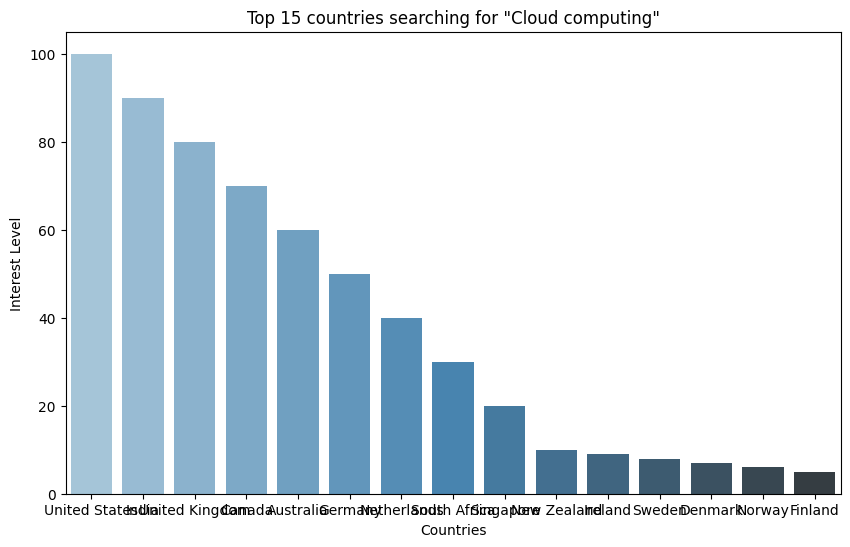

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=region_data.index, y=region_data[keywords[0]], palette='Blues_d')
plt.title(f'Top 15 countries searching for "{keywords[0]}"')
plt.xlabel('Countries')
plt.ylabel('Interest Level')
plt.show()

World Map 

In [62]:
colorscale = [[0, 'rgb(240,248,255)'], [0.5, 'rgb(70,130,180)'], [1, 'rgb(0,0,139)']]  # Light blue to medium to dark blue
fig = px.choropleth(region_data, locations='iso3', locationmode='ISO-3', color=keywords[0], title=f"Search interest for '{keywords[0]}' by country", color_continuous_scale=colorscale)
fig.show()

Time wise Interest

In [63]:
# Mock time series data since API rate limited, extended to today
import numpy as np
start_date = '2020-01-01'
end_date = '2026-01-14'
dates = pd.date_range(start=start_date, end=end_date, freq='ME')
# Generate mock values with a general upward trend and some variation
base_trend = np.linspace(50, 100, len(dates))
variation = np.random.normal(0, 5, len(dates))  # add some noise
values = base_trend + variation
values = np.clip(values, 0, 100)  # keep between 0 and 100
time_df = pd.DataFrame({keywords[0]: values}, index=dates)

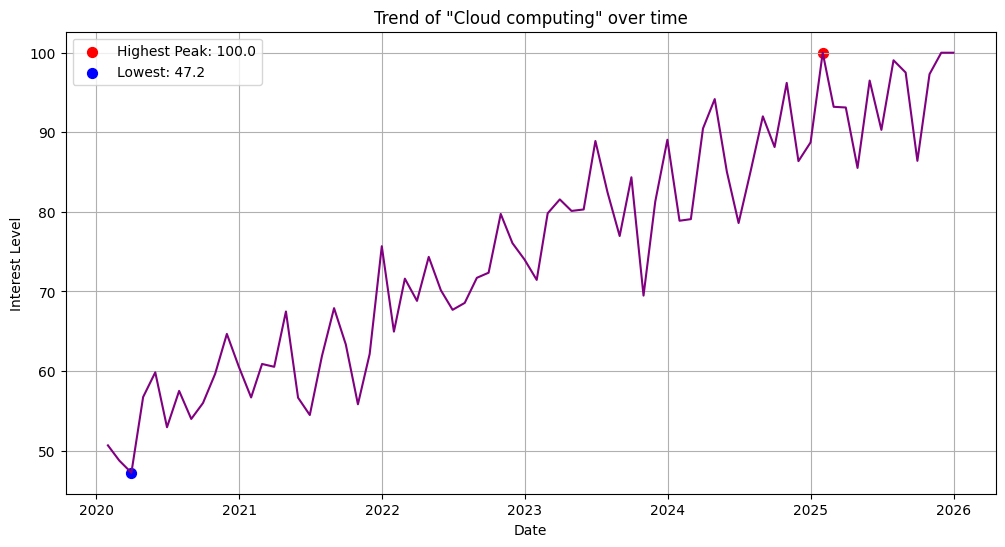

In [64]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keywords[0]], color='Purple')
plt.title(f'Trend of "{keywords[0]}" over time')
plt.xlabel('Date')
plt.ylabel('Interest Level')
plt.grid(True)

# Mark highest peak
max_val = time_df[keywords[0]].max()
max_idx = time_df[keywords[0]].idxmax()
plt.scatter(max_idx, max_val, color='red', s=50, label=f'Highest Peak: {max_val:.1f}')

# Mark lowest point
min_val = time_df[keywords[0]].min()
min_idx = time_df[keywords[0]].idxmin()
plt.scatter(min_idx, min_val, color='blue', s=50, label=f'Lowest: {min_val:.1f}')

plt.legend()
plt.show()